# **Sentiment Analysis for Mental Health**

### **Importing Dependencies**

In [1]:
# Print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot

### **Dataset Setup**

**Step 1: Setting the Directory**

In [2]:
# Base Directory
base_dir = '/Users/reemikadas/Desktop/SCU MSBA/Github/Data_Science/NLP_Projects/NLP | Sentiment Analysis for Mental Health'

# Data Directory
data_dir = os.path.join(base_dir, 'Data')
data_csv_path = os.path.join(data_dir, 'sentiment_health.csv')

**Step 2: Loading and Reading the Datasets**

In [3]:
# Loading the DataFrame
df = pd.read_csv(data_csv_path)

# Glimpse of the first 5 rows
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


### **Data Exploration**

In [4]:
# Note: First column has no name. Thus, rename the column for better clarity
df.rename(columns = {"Unnamed: 0":"unique_id"}, inplace = True)

# Glimpse of the first 5 rows
df.head()

,unique_id,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [5]:
# Dimension of Data
print("Dimension of Data: {}".format(df.shape))

Dimension of Data: (53043, 3)


In [6]:
# General info of Data (eg: Data Type, Total number of data per column, etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   unique_id  53043 non-null  int64 
 1   statement  52681 non-null  object
 2   status     53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [7]:
# Missing Data
df.isna().sum()

unique_id      0
statement    362
status         0
dtype: int64

A total of 362 statements are missing from the dataset.

In [8]:
# Verify rows with missing statements
df[df['statement'].isna()]

,unique_id,statement,status
293,293,NaN,Anxiety
572,572,NaN,Anxiety
595,595,NaN,Anxiety
1539,1539,NaN,Normal
2448,2448,NaN,Normal
...,...,...,...
52838,52838,NaN,Anxiety
52870,52870,NaN,Anxiety
52936,52936,NaN,Anxiety
53010,53010,NaN,Anxiety


In [9]:
# Verify rows with empty and whitespace strings
df[df['statement'] == ""]
df[df['statement'] == " "]

,unique_id,statement,status


,unique_id,statement,status


In [10]:
# Eliminate the rows with missing statement
df = df.dropna(subset = ['statement'])

# Verify
df.isna().sum()

unique_id    0
statement    0
status       0
dtype: int64

In [11]:
# Dimension after removing the missing statement
print("Dimension of Data after removing the missing statement: {}".format(df.shape))

Dimension of Data after removing the missing statement: (52681, 3)


### **Quick EDA**

In [12]:
# Distribution of each sentiment status
df['status'].value_counts()

status
Normal                  16343
Depression              15404
Suicidal                10652
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64

In [13]:
# Distinct Sentiment Status
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

In [14]:
# Total Sentiment Status
print("Total Sentiment Status: {}".format(df['status'].nunique()))

Total Sentiment Status: 7


<Figure size 1000x500 with 0 Axes>

<BarContainer object of 7 artists>

Text(0.5, 0, 'Health Status')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Distribution of Health Status')

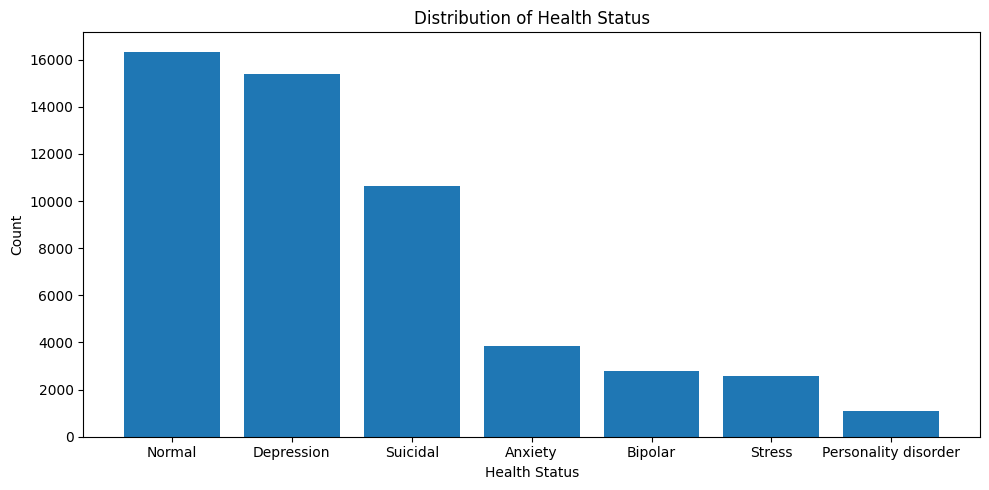

In [15]:
# Plot Class Distribution
plot_df = pd.DataFrame(df['status'].value_counts().sort_values(ascending = False)).reset_index()

plt.figure(figsize = (10,5))
plt.bar(plot_df['status'], plot_df['count'])
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.title('Distribution of Health Status')
plt.tight_layout()
plt.show()

This dataset is highly dominated by **Normal**, **Depression**, and **Suicidal** statuses (> 10k), which indicates the model will learn these patterns more easily. However, statuses like **Anxiety**, **Bipolar**, **Stress**, and **Personality Disorder** will struggle to classify correctly.

In [16]:
# Export the cleaned CSV
df.to_csv(os.path.join(data_dir, 'sentiment_health_cleaned.csv'), index = False)
print("Clean CSV file saved in the Data Directory.")

Clean CSV file saved in the Data Directory.
